<a href="https://colab.research.google.com/github/zzhining/public_data_analysis/blob/main/w10_ml_basic_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week10. 수치형 데이터의 분석
---


## 실습 목표
---
머신러닝 프로세스 과정을 이해하고, 데이터 전처리, 학습, 평가 단계를 구현합니다. 

**[머신러닝 프로세스의 과정]**
1. **데이터 읽기 및 탐색:** 주어진 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

3. **머신러닝 모델 수행:** 분류 모델을 사용하여 학습 수행, 평가 및 예측 수행

**[데이터]**
- [위스콘신 유방암 데이터](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

## 1. 데이터 읽기
---

### 1.1 라이브러리 불러오기
---
머신러닝에 필요한 주요 라이브러리를 불러옵니다.

 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리
 - **sklearn.datasets**: 학습 데이터 셋을 불러오기 위한 라이브러리
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

### 1.2 데이터 불러오기
---

sklearn의 내장 데이터 셋 중 `breast cancer` 데이터를 불러와서 Dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [2]:
# Dataset 읽어오기
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['label'] = data.target

# 데이터프레임의 상위 5개 항목 출력
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


31개의 컬럼을 갖는 데이터프레임을 불러왔습니다.

### 1.3 데이터 탐색
---

`df`의 컬럼별 요약정보(info)를 확인합니다. 각 컬럼별 데이터 타입과 결측치 여부를 확인합니다.

In [3]:
# 컬럼별 요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## 2. 데이터 전처리
---
머신러닝을 하기 위한 데이터 전처리를 수행합니다. 독립변수(X)와 종속변수(Y)로 각 컬럼을 나누고, 학습용 데이터와 테스트용 데이터로 분할하는 데이터 분할을 수행합니다. 독립변수(X)에 대해서 정규화를 수행합니다.

### 2.1 종속변수, 독립변수 할당

In [4]:
# 전체 컬럼에서 0~29번 컬럼에 해당하는 값을 독립변수(X)로 할당
X = df.iloc[:, :30]

# label 컬럼을 종속변수(y)로 할당
y = df['label']

# X에 할당된 값 확인
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


X에 `label`를 제외한 모든 컬럼이 할당되었습니다.

### 2.2 학습용, 테스트용 데이터 분할

train_test_split()을 사용하여 전처리가 완료된 데이터를 분할합니다.

In [5]:
# sklearn에서 제공하는 train_test_split 임포트
from sklearn.model_selection import train_test_split

# 데이터 분할
# - 테스트용 데이터의 비율을 20%로 설정
# - 동일한 샘플링 결과를 얻기 위해 random_state 설정
# - y의 비율을 기준으로 샘플링
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify = y)

# 분할된 변수의 결과 출력
print('X: {}, X_train: {}, X_test:{}'.format(X.shape, X_train.shape, X_test.shape))
print('y: {}, y_train: {}, y_test:{}'.format(y.shape, y_train.shape, y_test.shape))

X: (569, 30), X_train: (455, 30), X_test:(114, 30)
y: (569,), y_train: (455,), y_test:(114,)


569개의 데이터가 학습용 데이터 455개, 테스트용 데이터 114개로 분할되었습니다.

In [6]:
# y값을 기준으로 계층적(stratified) 샘플링이 적용되어 데이터가 분할되었는지 여부를 확인
print(y.value_counts()/len(y) * 100)
print(y_train.value_counts()/len(y_train) * 100)
print(y_test.value_counts()/len(y_test) * 100)

1    62.741652
0    37.258348
Name: label, dtype: float64
1    62.637363
0    37.362637
Name: label, dtype: float64
1    63.157895
0    36.842105
Name: label, dtype: float64


0과 1의 비율이 학습용 데이터셋과 테스트용 데이터 셋 모두 약 63:37로 기존 데이터의 비율과 동일하게 분할되었습니다.

## 3. 머신러닝 모델 수행
---

다음의 알고리즘을 사용하여 분류(classifier) 모델을 생성하는 머신러닝 학습을 수행합니다.

- 의사결정나무
- 랜덤포레스트
- XGBoost

### 3.1 의사결정나무(DecisionTree)
---

#### 3.1.1 학습

DecisionTreeClassifier 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [7]:
# DecisionTreeClassifier 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier

# 기본 매개변수를 사용하는 DecisionTreeClassifier 생성
tree = DecisionTreeClassifier(random_state=42)

# 생성한 tree 객체를 학습용 데이터를 사용하여 학습
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 3.1.2 평가


In [9]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.956


기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 95.6%입니다.

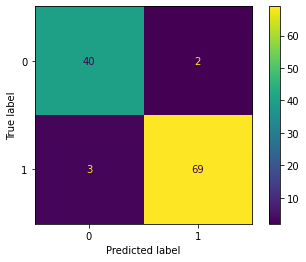

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# X_test를 입력으로하여 결과값 예측
y_pred = tree.predict(X_test)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 2건, 실제값이 1인데 예측을 0으로 하는 경우가 3건이 존재합니다.

---

### 3.2 랜덤포레스트

#### 3.2.1 학습

랜덤포레스트의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [11]:
# RandomForestClassifier 라이브러리 불러오기
from sklearn.ensemble import RandomForestClassifier
# 기본 매개변수를 사용하여 RandomForestClassifier 객체 생성
rfc = RandomForestClassifier(random_state=42)
# 생성한 RandomForestClassifier 객체를 학습용 데이터를 사용하여 학습
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
RandomForestClassifier?

#### 3.2.2 평가

In [13]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(rfc.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(rfc.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.956


기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 95.6%입니다.

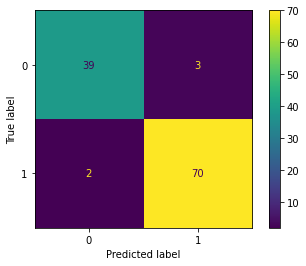

In [14]:
# X_test를 입력으로하여 결과값 예측
y_pred = rfc.predict(X_test)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 2건 존재합니다.

### 3.3 XGBoost

---

#### 3.3.1 학습

xgboost의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [15]:
# XGBClassifier 라이브러리 불러오기
from xgboost import XGBClassifier
# 기본 매개변수를 사용하여 RandomForestClassifier 객체 생성
xgb = XGBClassifier(random_state=42)
# 생성한 RandomForestClassifier 객체를 학습용 데이터를 사용하여 학습
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

#### 3.3.2 평가

In [16]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(xgb.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(xgb.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.974


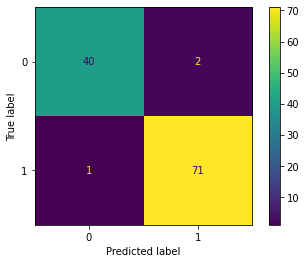

In [17]:
# X_test를 입력으로하여 결과값 예측
y_pred = xgb.predict(X_test)

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

### 3.4 VotingClassifier

In [18]:
# VotingClassifier 라이브러리 불러오기
from sklearn.ensemble import VotingClassifier

# 랜덤포레스트와 XGBoost를 앙상블하는 모델 생성
voting_classifier = VotingClassifier(estimators=[('RF',rfc), ('xgb',xgb)], voting='hard')

# 생성한 VotingClassifier 객체를 학습용 데이터를 사용하여 학습
voting_classifier.fit(X_train , y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=42)),
                             ('xgb', XGBClassifier(random_state=42))])

In [19]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(voting_classifier.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(voting_classifier.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.965


In [20]:
# 생성한 모델을 리스트로 관리
model_list = [tree, rfc, xgb, voting_classifier]

# 모델 리스트를 반복문을 통해 각 정확도 및 혼동행렬을 출력
for model in model_list:
    # 학습
    model.fit(X_train , y_train)
    
    # 평가
    score = model.score(X_test, y_test)    
    
    # 모델 정확도 출력
    print('{0} 정확도:\t {1:.2f}'.format(model.__class__.__name__, score)) 

DecisionTreeClassifier 정확도:	 0.96
RandomForestClassifier 정확도:	 0.96
XGBClassifier 정확도:	 0.97
VotingClassifier 정확도:	 0.96


## 4. 하이퍼파라미터 튜닝
---

In [21]:
from sklearn.model_selection import GridSearchCV

# 모델 - DecisionTreeClassifier 
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 파라미터
param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# 학습 - param_grid의 하이퍼파라미터들을 순차적으로 학습
grid_trees = GridSearchCV(tree_model, param_grid=param, cv=3)
grid_trees.fit(X_train, y_train)

# 학습 결과 - GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_trees.cv_results_)
scores_df.iloc[:, 6:]

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.888158,0.907895,0.907285,0.901112,0.009164,5
1,"{'max_depth': 1, 'min_samples_split': 3}",0.888158,0.907895,0.907285,0.901112,0.009164,5
2,"{'max_depth': 2, 'min_samples_split': 2}",0.921053,0.921053,0.940397,0.927501,0.009119,1
3,"{'max_depth': 2, 'min_samples_split': 3}",0.921053,0.921053,0.940397,0.927501,0.009119,1
4,"{'max_depth': 3, 'min_samples_split': 2}",0.907895,0.927632,0.907285,0.914270,0.009451,3
5,"{'max_depth': 3, 'min_samples_split': 3}",0.907895,0.927632,0.907285,0.914270,0.009451,3


In [22]:
# 최적 estimator
grid_trees.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=42)

In [23]:
# 최적 파라미터
grid_trees.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [24]:
# 최적 estimator의 성능
grid_trees.best_score_

0.9275008713837574